#**Challenge Telecom X2**

## Carga de Dataset


In [2]:
# 📂 Carga de datos limpios desde GitHub
# ============================================
# En este paso cargamos el archivo CSV previamente limpiado.
# El archivo se encuentra almacenado en el repositorio de GitHub:
# https://github.com/elenacampos89/Telecom_X2



import pandas as pd

# URL al archivo CSV en GitHub (versión raw)
url = "https://raw.githubusercontent.com/elenacampos89/Telecom_X2/main/TelecomX_Data_Clean.csv"

# Cargar el dataset
df = pd.read_csv(url, encoding='utf-8-sig')

# Vista previa
df.head()

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges,no_phone_service,internetservice_none
0,0002-ORFBO,no,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,"{""monthly"": 65.6, ""total"": ""593.3""}",0,0
1,0003-MKNFE,no,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,"{""monthly"": 59.9, ""total"": ""542.4""}",0,0
2,0004-TLHLJ,yes,male,0,0,0,4,1,0,fiber_optic,...,1,0,0,0,month-to-month,1,electronic check,"{""monthly"": 73.9, ""total"": ""280.85""}",0,0
3,0011-IGKFF,yes,male,1,1,0,13,1,0,fiber_optic,...,1,0,1,1,month-to-month,1,electronic check,"{""monthly"": 98.0, ""total"": ""1237.85""}",0,0
4,0013-EXCHZ,yes,female,1,1,0,3,1,0,fiber_optic,...,0,1,1,0,month-to-month,1,mailed check,"{""monthly"": 83.9, ""total"": ""267.4""}",0,0


## Limpieza y Estandarización y Transformación


In [3]:
# ============================================
# ✂️ Eliminación de columnas irrelevantes
# ============================================
# Eliminamos columnas que no aportan valor predictivo directo,
# como identificadores únicos (e.g., customerID) o campos redundantes.
# Esto ayuda a que los modelos no se vean sesgados por valores arbitrarios.

# Copia del DataFrame original
df_model = df.copy()

# Lista de columnas irrelevantes a eliminar
cols_irrelevantes = [
    'customerid',           # ID único del cliente
    'no_phone_service',     # bandera derivada, redundante con 'multiplelines'
    'internetservice_none'  # bandera derivada, redundante con 'internetservice'
]

# Eliminar si existen en el DataFrame
df_model.drop(columns=[c for c in cols_irrelevantes if c in df_model.columns], inplace=True)

# ============================================
# ✅ Selección de columnas relevantes
# ============================================
# Ejemplo de columnas relevantes para modelar la cancelación (churn)
# Basado en el dataset limpio y estandarizado
columnas_relevantes = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'tenure',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
    'charges.monthly',
    'charges.total',
    'churn'  # variable objetivo
]

# Filtramos el DataFrame para que solo contenga las columnas relevantes
df_model = df_model[[col for col in columnas_relevantes if col in df_model.columns]]

# Vista previa del DataFrame final
df_model.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,female,0,1,1,9,1,0,dsl,0,1,0,1,1,0,one year,1,mailed check,no
1,male,0,0,0,9,1,1,dsl,0,0,0,0,0,1,month-to-month,0,mailed check,no
2,male,0,0,0,4,1,0,fiber_optic,0,0,1,0,0,0,month-to-month,1,electronic check,yes
3,male,1,1,0,13,1,0,fiber_optic,0,1,1,0,1,1,month-to-month,1,electronic check,yes
4,female,1,1,0,3,1,0,fiber_optic,0,0,0,1,1,0,month-to-month,1,mailed check,yes


##Notas:

--> df_model es la versión lista para modelado, separada del DataFrame original.

--> Se eliminaron las columnas  redundantes (no_phone_service, internetservice_none) porque esa información ya está contenida en otras columnas.


In [4]:
# ============================================
# 🔄 Transformación de variables categóricas
# ============================================
# Los algoritmos de Machine Learning requieren que las variables categóricas
# estén en formato numérico. Para ello usamos One-Hot Encoding.
# ============================================

# Copiamos el DataFrame final para transformación
df_encoded = df_model.copy()

# Identificar variables categóricas (tipo object o category)
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

# Excluir la variable objetivo 'churn' si la vamos a tratar aparte
if 'churn' in categorical_cols:
    categorical_cols.remove('churn')

print(f"Variables categóricas a codificar: {categorical_cols}")

# Aplicar One-Hot Encoding con pandas.get_dummies()
df_encoded = pd.get_dummies(
    df_encoded,
    columns=categorical_cols,    # columnas a transformar
    drop_first=True,              # evita multicolinealidad
    dtype=int                     # asegura tipo entero
)

# Aseguramos que 'churn' también esté en formato binario
if df_encoded['churn'].dtype == 'object':
    df_encoded['churn'] = df_encoded['churn'].map({'yes': 1, 'no': 0})

# Vista previa del DataFrame transformado
df_encoded.head()

Variables categóricas a codificar: ['gender', 'internetservice', 'contract', 'paymentmethod']


,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,paperlessbilling,churn,gender_male,internetservice_fiber_optic,internetservice_no,contract_one year,contract_two year,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
0,0,1,1,9,1,0,0,1,0,1,...,1,0.0,0,0,0,1,0,0,0,1
1,0,0,0,9,1,1,0,0,0,0,...,0,0.0,1,0,0,0,0,0,0,1
2,0,0,0,4,1,0,0,0,1,0,...,1,1.0,1,1,0,0,0,0,1,0
3,1,1,0,13,1,0,0,1,1,0,...,1,1.0,1,1,0,0,0,0,1,0
4,1,1,0,3,1,0,0,0,0,1,...,1,1.0,0,1,0,0,0,0,0,1


## Verificación de la Proporcion de Cancelación (Churn)

🔹 Cantidad de clientes por clase:

churn
0.0    5174
1.0    1869
Name: count, dtype: int64

🔹 Proporción de clientes por clase (%):

churn
0.0    73.46
1.0    26.54
Name: proportion, dtype: float64


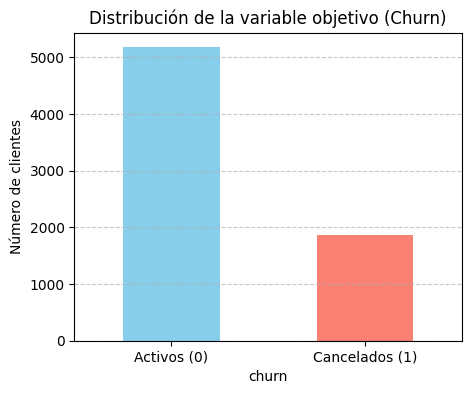

In [5]:
# ============================================
# 📊 Evaluación del balance de clases en 'churn'
# ============================================
# Queremos saber la proporción de clientes que cancelaron (1)
# versus los que permanecieron activos (0).
# Esto nos ayudará a identificar si existe un desbalance de clases
# que pueda impactar en el rendimiento del modelo.
# ============================================

# Contar la cantidad de clientes por clase
class_counts = df_encoded['churn'].value_counts()

# Calcular proporciones
class_proportions = df_encoded['churn'].value_counts(normalize=True) * 100

# Mostrar resultados
print("🔹 Cantidad de clientes por clase:\n")
print(class_counts)
print("\n🔹 Proporción de clientes por clase (%):\n")
print(class_proportions.round(2))

# Visualización opcional
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xticks(ticks=[0,1], labels=['Activos (0)', 'Cancelados (1)'], rotation=0)
plt.ylabel('Número de clientes')
plt.title('Distribución de la variable objetivo (Churn)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

*   Si una clase (por ejemplo, 0 activos) representa más del 70-80% de los casos, se considera que existe desbalance de clases.



In [6]:
# ============================================
# 📏 Evaluar necesidad de normalización/estandarización
# ============================================
# Modelos que SÍ requieren normalizar/estandarizar:
# - KNN, SVM, Regresión Logística, Redes Neuronales
#
# Modelos que NO lo requieren:
# - Árboles de decisión, Random Forest, XGBoost, LightGBM
# ============================================

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleccionamos solo las columnas numéricas (excluyendo la variable objetivo)
numeric_cols = df_encoded.drop(columns=['churn']).select_dtypes(include=['int64', 'float64']).columns

print("Columnas numéricas a evaluar:", list(numeric_cols))

# ============================================
# 📊 Estadísticas básicas para evaluar escalas
# ============================================
print("\nEstadísticas de las variables numéricas:\n")
print(df_encoded[numeric_cols].describe().T)

# ============================================
# 🛠 Ejemplo de estandarización (media=0, desv=1)
# ============================================
scaler_standard = StandardScaler()
df_standardized = df_encoded.copy()
df_standardized[numeric_cols] = scaler_standard.fit_transform(df_standardized[numeric_cols])

# ============================================
# 🛠 Ejemplo de normalización (escala 0 a 1)
# ============================================
scaler_minmax = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[numeric_cols] = scaler_minmax.fit_transform(df_normalized[numeric_cols])

# Mostrar ejemplo
print("\n🔹 Ejemplo - Primeras filas después de Estandarización:\n")
print(df_standardized[numeric_cols].head())

print("\n🔹 Ejemplo - Primeras filas después de Normalización:\n")
print(df_normalized[numeric_cols].head())

Columnas numéricas a evaluar: ['seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling', 'gender_male', 'internetservice_fiber_optic', 'internetservice_no', 'contract_one year', 'contract_two year', 'paymentmethod_credit card (automatic)', 'paymentmethod_electronic check', 'paymentmethod_mailed check']

Estadísticas de las variables numéricas:

                                        count       mean        std  min  25%  \
seniorcitizen                          7267.0   0.162653   0.369074  0.0  0.0   
partner                                7267.0   0.484106   0.499782  0.0  0.0   
dependents                             7267.0   0.300124   0.458343  0.0  0.0   
tenure                                 7267.0  32.346498  24.571773  0.0  9.0   
phoneservice                           7267.0   0.902711   0.296371  0.0  1.0   
multiplelines    

 ## **Correlacion y Seleccion de Variables**

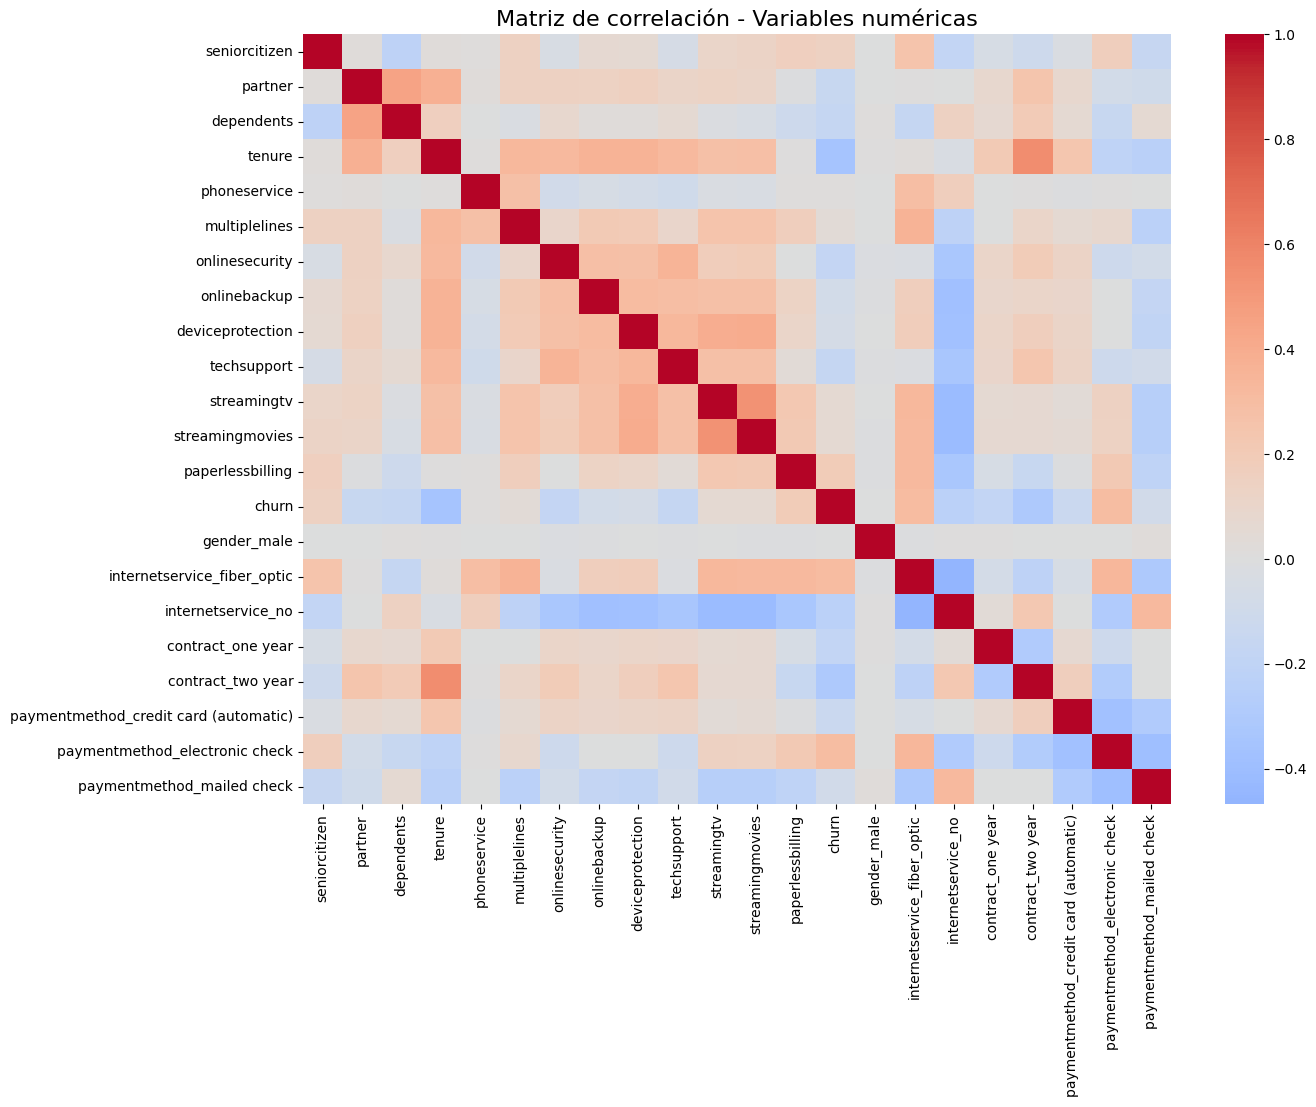

📌 Correlación de cada variable con churn (ordenada):

churn                                    1.000000
internetservice_fiber_optic              0.308020
paymentmethod_electronic check           0.301919
paperlessbilling                         0.191825
seniorcitizen                            0.150889
streamingtv                              0.063228
streamingmovies                          0.061382
multiplelines                            0.040102
phoneservice                             0.011942
gender_male                             -0.008612
deviceprotection                        -0.066160
onlinebackup                            -0.082255
paymentmethod_mailed check              -0.091683
paymentmethod_credit card (automatic)   -0.134302
partner                                 -0.150448
dependents                              -0.164221
techsupport                             -0.164674
onlinesecurity                          -0.171226
contract_one year                       -0.177

/tmp/ipython-input-1325189433.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacion_churn.values, y=correlacion_churn.index, palette='coolwarm')


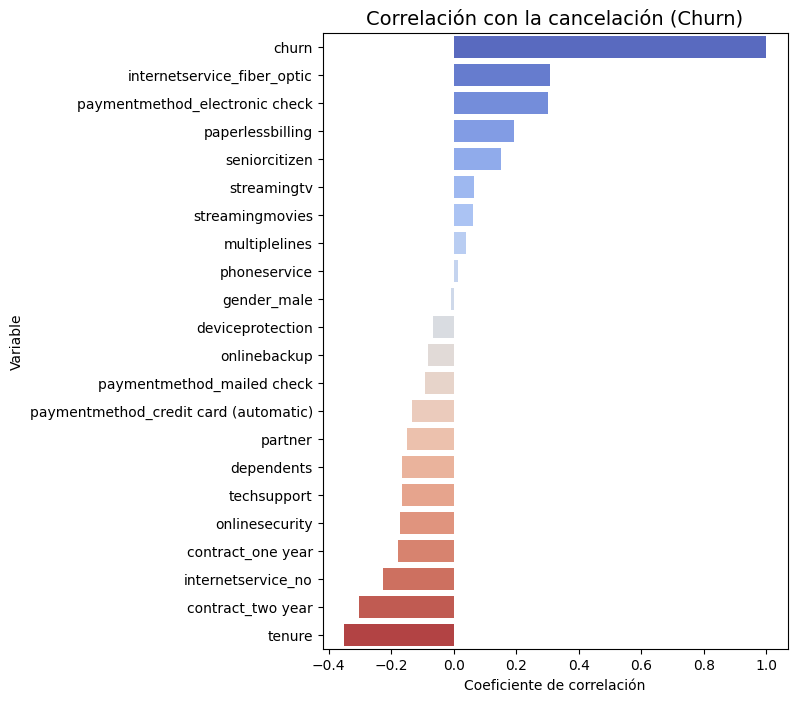

In [7]:
# ============================================
# 🔍 Matriz de correlación y análisis con 'churn'
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación solo con variables numéricas
corr_matrix = df_encoded.corr(numeric_only=True)

# ========================
# 🔹 Visualización completa
# ========================
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de correlación - Variables numéricas", fontsize=16)
plt.show()

# ========================
# 🔹 Correlación con 'churn'
# ========================
correlacion_churn = corr_matrix['churn'].sort_values(ascending=False)

print("📌 Correlación de cada variable con churn (ordenada):\n")
print(correlacion_churn)

# Visualización enfocada solo en 'churn'
plt.figure(figsize=(6,8))
sns.barplot(x=correlacion_churn.values, y=correlacion_churn.index, palette='coolwarm')
plt.title("Correlación con la cancelación (Churn)", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variable")
plt.show()

📊 **Variables con mayor correlación positiva con churn (cancelación)**

-  paperlessbilling → Los clientes con facturación sin papel tienden a cancelar más, posiblemente porque coincide con clientes digitales que contratan planes más flexibles o de corto plazo.

-  paymentmethod_electronic check → Método de pago muy asociado a cancelaciones, tal vez por su uso en clientes con menor permanencia o con contratos mes a mes.

-  internetservice_fiber_optic → Los clientes con fibra óptica muestran más churn que los de DSL o sin servicio, lo que puede deberse a costos más altos o a competencia de otros proveedores.

**📊 Variables con mayor correlación negativa con churn (protectoras)**

-  tenure → A mayor tiempo como cliente, menor probabilidad de cancelación. Es el factor negativo más fuerte, típico en churn.

-  contract_two year → Contratos a 2 años retienen más clientes que los de mes a mes o 1 año.

-  onlinesecurity y techsupport → Servicios adicionales de seguridad en línea y soporte técnico disminuyen la probabilidad de cancelación, probablemente por aumentar la satisfacción y dependencia del servicio.

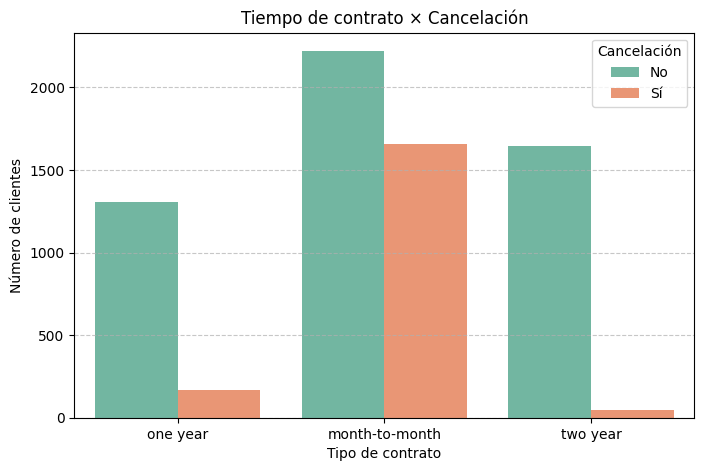

In [8]:
# ============================================
# 📊 Relación de variables específicas con la cancelación
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Usar el DataFrame antes del one-hot encoding
df_plot = df_model.copy()

# Convertir churn a etiquetas legibles
df_plot['churn_label'] = df_plot['churn'].map({1: 'Sí', 0: 'No', 'yes': 'Sí', 'no': 'No'})

# ========================
# Tiempo de contrato × Cancelación
# ========================
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df_plot, x='contract', hue='churn_label', palette='Set2')
plt.title("Tiempo de contrato × Cancelación")
plt.xlabel("Tipo de contrato")
plt.ylabel("Número de clientes")
plt.legend(title="Cancelación")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Modelado Predictivo

In [9]:
# ===========================================
# ✂️ División del dataset en entrenamiento y prueba
# ============================================
# Contar valores nulos en churn
nulos_churn = df_encoded['churn'].isna().sum()
total_registros = len(df_encoded)

print(f"🔹 Registros totales: {total_registros}")
print(f"🔹 Registros con churn nulo: {nulos_churn}")
print(f"🔹 Porcentaje de registros con churn nulo: {nulos_churn / total_registros * 100:.2f}%")

# Ver ejemplos de registros con churn nulo (opcional)
df_encoded[df_encoded['churn'].isna()].head()

🔹 Registros totales: 7267
🔹 Registros con churn nulo: 224
🔹 Porcentaje de registros con churn nulo: 3.08%


,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,...,paperlessbilling,churn,gender_male,internetservice_fiber_optic,internetservice_no,contract_one year,contract_two year,paymentmethod_credit card (automatic),paymentmethod_electronic check,paymentmethod_mailed check
30,0,0,0,11,1,1,1,0,0,0,...,1,NaN,0,1,0,0,0,0,0,0
75,0,0,0,71,1,0,0,0,0,0,...,1,NaN,1,0,1,0,1,1,0,0
96,0,0,0,29,1,0,1,1,0,1,...,1,NaN,1,0,0,1,0,0,1,0
98,1,0,0,5,1,0,1,1,0,1,...,0,NaN,0,0,0,0,0,1,0,0
175,1,1,0,65,1,1,0,1,1,0,...,1,NaN,1,1,0,1,0,0,0,0


In [10]:
 # Eliminar registros con churn nulo
df_encoded = df_encoded.dropna(subset=['churn'])

# Variables predictoras (X) y objetivo (y)
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

from sklearn.model_selection import train_test_split

# División 70% entrenamiento / 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Verificar tamaños y balance
print(f"Tamaño entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño prueba: {X_test.shape[0]} filas")
print(f"Proporción de clases en entrenamiento:\n{y_train.value_counts(normalize=True)}")
print(f"Proporción de clases en prueba:\n{y_test.value_counts(normalize=True)}")

Tamaño entrenamiento: 4930 filas
Tamaño prueba: 2113 filas
Proporción de clases en entrenamiento:
churn
0.0    0.734686
1.0    0.265314
Name: proportion, dtype: float64
Proporción de clases en prueba:
churn
0.0    0.734501
1.0    0.265499
Name: proportion, dtype: float64


##  **Creación de Modelos**

In [13]:
# ============================================
# 📌 Normalizar o no normalizar: Justificación
#
# 🔹 Modelos que requieren normalización:
#    - Regresión Logística, KNN, SVM, Redes Neuronales.
#    - Son sensibles a la escala de las variables porque calculan distancias
#      o ajustan parámetros basados en sus magnitudes.
#    - Sin normalización, una variable con valores grandes puede dominar el
#      entrenamiento aunque no sea la más relevante.
#    - Solución: aplicar StandardScaler (media 0, desviación estándar 1)
#      o MinMaxScaler (escala 0–1) para poner todas las variables numéricas
#      en un rango comparable y evitar sesgos.
#
# 🔹 Modelos que NO requieren normalización:
#    - Árboles de Decisión, Random Forest, XGBoost, LightGBM.
#    - No dependen de distancias ni magnitudes, sino que dividen los datos
#      en función de umbrales internos (ej. "tenure > 12 meses").
#    - Normalizar no mejora el rendimiento y puede ser un paso innecesario.
#
# En este proyecto se probarán ambos casos:
#    1) Un modelo con normalización (Regresión Logística).
#    2) Un modelo sin normalización (Random Forest).
# ============================================

In [11]:
# ============================================
# 🤖 Modelos de Churn: con y sin normalización
# ============================================
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import numpy as np
import pandas as pd

# --------------------------------------------
# 1) MODELO SENSIBLE A LA ESCALA: Regresión Logística (con StandardScaler)
# --------------------------------------------
pipe_log = Pipeline(steps=[
    ("scaler", StandardScaler()),                    # Normalización/Estandarización
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",                     # ayuda si hay desbalance
        n_jobs=None                                  # (parámetro no aplicable a LogisticRegression en versiones antiguas)
    ))
])

pipe_log.fit(X_train, y_train)

y_pred_log  = pipe_log.predict(X_test)
y_proba_log = pipe_log.predict_proba(X_test)[:, 1]

# --------------------------------------------
# 2) MODELO NO SENSIBLE A LA ESCALA: Random Forest (sin scaler)
# --------------------------------------------
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight="balanced_subsample",               # ayuda con desbalance
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf  = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# --------------------------------------------
# 3) FUNCIÓN AUXILIAR PARA MOSTRAR MÉTRICAS
# --------------------------------------------
def evaluar_modelo(nombre, y_true, y_pred, y_proba):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    auc  = roc_auc_score(y_true, y_proba)

    print(f"\n================= {nombre} =================")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")
    print("\nMatriz de confusión:")
    print(confusion_matrix(y_true, y_pred))
    print("\nReporte de clasificación:")
    print(classification_report(y_true, y_pred, zero_division=0))

# --------------------------------------------
# 4) EVALUACIÓN
# --------------------------------------------
evaluar_modelo("Regresión Logística (con normalización)", y_test, y_pred_log, y_proba_log)
evaluar_modelo("Random Forest (sin normalización)",        y_test, y_pred_rf,  y_proba_rf)


================= Regresión Logística (con normalización) =================
Accuracy : 0.7378
Precision: 0.5040
Recall   : 0.7879
F1-score : 0.6147
ROC-AUC  : 0.8391

Matriz de confusión:
[[1117  435]
 [ 119  442]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1552
         1.0       0.50      0.79      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113


================= Random Forest (sin normalización) =================
Accuracy : 0.7700
Precision: 0.5796
Recall   : 0.4866
F1-score : 0.5291
ROC-AUC  : 0.8051

Matriz de confusión:
[[1354  198]
 [ 288  273]]

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      1552
         1.0       0.58      0.49      0.53       561

    accuracy                 

## Evalucion de los Modelos


================= Regresión Logística (con normalización) =================
Train -> Acc: 0.757 | Prec: 0.528 | Rec: 0.804 | F1: 0.637 | AUC: 0.849
Test  -> Acc: 0.738 | Prec: 0.504 | Rec: 0.788 | F1: 0.615 | AUC: 0.839

📄 Reporte de clasificación (Test):
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1552
         1.0       0.50      0.79      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.74      0.75      2113



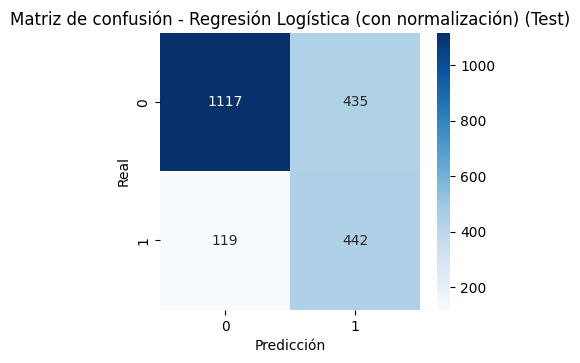

🔎 Diagnóstico: Generalmente balanceado (sin señales claras de over/underfitting).

================= Random Forest (sin normalización) =================
Train -> Acc: 0.980 | Prec: 0.935 | Rec: 0.994 | F1: 0.963 | AUC: 0.996
Test  -> Acc: 0.770 | Prec: 0.580 | Rec: 0.487 | F1: 0.529 | AUC: 0.805

📄 Reporte de clasificación (Test):
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      1552
         1.0       0.58      0.49      0.53       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



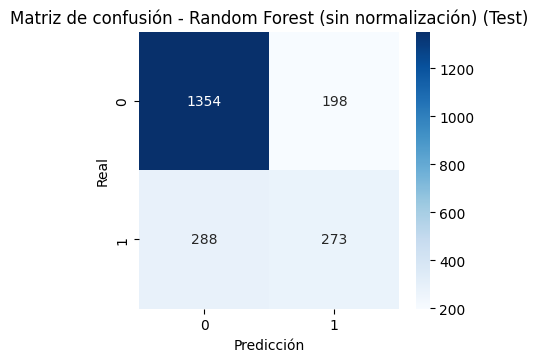

🔎 Diagnóstico: Posible OVERFITTING (F1_train alto y brecha significativa vs F1_test).

================= Comparación de modelos (ordenado por F1_test) =================


,modelo,acc_train,acc_test,prec_test,rec_test,f1_test,auc_test,gap_f1,diagnostico
0,Regresión Logística (con normalización),0.757404,0.737814,0.503991,0.787879,0.614743,0.839084,0.022613,Generalmente balanceado (sin señales claras de...
1,Random Forest (sin normalización),0.979919,0.769995,0.579618,0.486631,0.529070,0.805091,0.434250,Posible OVERFITTING (F1_train alto y brecha si...


In [14]:
# ============================================
# 📊 Evaluación integral de modelos de Churn
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

# ---------------------------
# Funciones auxiliares
# ---------------------------
def _y_proba_safely(model, X):
    """Obtiene probabilidades de clase positiva si el modelo lo soporta."""
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        # Escalar a [0,1] de forma aproximada
        scores = model.decision_function(X)
        # min-max para visualizar AUC; no afecta predicciones
        s_min, s_max = scores.min(), scores.max()
        return (scores - s_min) / (s_max - s_min + 1e-9)
    else:
        # Sin probabilidades, usar predicción dura (menos ideal para AUC)
        return model.predict(X).astype(float)

def evaluar_train_test(nombre, model, X_train, y_train, X_test, y_test, mostrar_cm=True):
    """Calcula métricas en Train/Test, imprime reporte y regresa un dict con resultados clave."""
    # Predicciones y probabilidades
    ypred_tr  = model.predict(X_train)
    ypred_te  = model.predict(X_test)
    yproba_tr = _y_proba_safely(model, X_train)
    yproba_te = _y_proba_safely(model, X_test)

    # Métricas
    met = {}
    met["modelo"] = nombre

    # Train
    met["acc_train"] = accuracy_score(y_train, ypred_tr)
    met["prec_train"] = precision_score(y_train, ypred_tr, zero_division=0)
    met["rec_train"]  = recall_score(y_train, ypred_tr, zero_division=0)
    met["f1_train"]   = f1_score(y_train, ypred_tr, zero_division=0)
    met["auc_train"]  = roc_auc_score(y_train, yproba_tr)

    # Test
    met["acc_test"] = accuracy_score(y_test, ypred_te)
    met["prec_test"] = precision_score(y_test, ypred_te, zero_division=0)
    met["rec_test"]  = recall_score(y_test, ypred_te, zero_division=0)
    met["f1_test"]   = f1_score(y_test, ypred_te, zero_division=0)
    met["auc_test"]  = roc_auc_score(y_test, yproba_te)

    # Impresión corta
    print(f"\n================= {nombre} =================")
    print(f"Train -> Acc: {met['acc_train']:.3f} | Prec: {met['prec_train']:.3f} | Rec: {met['rec_train']:.3f} | F1: {met['f1_train']:.3f} | AUC: {met['auc_train']:.3f}")
    print(f"Test  -> Acc: {met['acc_test']:.3f} | Prec: {met['prec_test']:.3f} | Rec: {met['rec_test']:.3f} | F1: {met['f1_test']:.3f} | AUC: {met['auc_test']:.3f}")

    # Reporte y matrices de confusión
    print("\n📄 Reporte de clasificación (Test):")
    print(classification_report(y_test, ypred_te, zero_division=0))

    if mostrar_cm:
        cm = confusion_matrix(y_test, ypred_te)
        plt.figure(figsize=(4.2,3.6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Matriz de confusión - {nombre} (Test)")
        plt.xlabel("Predicción")
        plt.ylabel("Real")
        plt.show()

    # Diagnóstico simple de overfitting/underfitting
    gap_f1 = met["f1_train"] - met["f1_test"]
    if (met["f1_train"] >= 0.80) and (gap_f1 >= 0.10):
        diagnostico = "Posible OVERFITTING (F1_train alto y brecha significativa vs F1_test)."
    elif (met["f1_train"] < 0.60) and (met["f1_test"] < 0.60):
        diagnostico = "Posible UNDERFITTING (bajo desempeño en Train y Test)."
    else:
        diagnostico = "Generalmente balanceado (sin señales claras de over/underfitting)."

    print(f"🔎 Diagnóstico: {diagnostico}")
    met["diagnostico"] = diagnostico
    met["gap_f1"] = gap_f1

    return met

# ---------------------------
# Evaluación de modelos
# ---------------------------
resultados = []
resultados.append(evaluar_train_test("Regresión Logística (con normalización)", pipe_log, X_train, y_train, X_test, y_test))
resultados.append(evaluar_train_test("Random Forest (sin normalización)", rf, X_train, y_train, X_test, y_test))

# Tabla comparativa
df_resultados = pd.DataFrame(resultados)[[
    "modelo","acc_train","acc_test","prec_test","rec_test","f1_test","auc_test","gap_f1","diagnostico"
]].sort_values(by="f1_test", ascending=False)

print("\n================= Comparación de modelos (ordenado por F1_test) =================")
display(df_resultados)

## Observaciones

**Regresión Logística**

-  Mejor F1-score y Recall que el Random Forest, lo que indica que detecta más clientes que cancelan, aunque con menor precisión.

-  Resultados similares en train y test → sin señales claras de overfitting.

-  Podría beneficiarse de ajuste de hiperparámetros (regularización C, penalización l1 o l2) para mejorar precisión sin perder recall.

-  Random Forest

-  F1-score más bajo en test y diferencia muy grande con train (0.963 vs 0.529) → clara señal de overfitting.

-  Altísimo rendimiento en train indica que el modelo memorizó demasiado y no generaliza bien.

**-  Posibles ajustes:**

-  Reducir profundidad máxima de los árboles (max_depth).

-  Menos árboles (n_estimators) o más control de división (min_samples_split).

-  Usar max_features para limitar variables por división.

-  Aplicar validación cruzada para encontrar parámetros óptimos.



 **💡 Recomendación inicial**

-  Usar la Regresión Logística como baseline por su mayor estabilidad y menor riesgo de overfitting.

-  Afinar el Random Forest con GridSearch/RandomizedSearch para intentar cerrar la brecha entre train y test.

-  Si el objetivo es maximizar recall (detectar la mayor cantidad de churn posible), priorizar modelos con recall alto aunque sacrifiquen algo de precisión.

In [16]:
# ============================================
# ⚡ RandomizedSearchCV (rápido) para dos modelos
# ============================================
import numpy as np
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

def evaluar_rapido(nombre, modelo, X_te, y_te):
    y_pred  = modelo.predict(X_te)
    y_proba = modelo.predict_proba(X_te)[:,1] if hasattr(modelo, "predict_proba") else y_pred.astype(float)
    print(f"\n[{nombre}]  Acc: {accuracy_score(y_te,y_pred):.3f} | Prec: {precision_score(y_te,y_pred,zero_division=0):.3f} | "
          f"Rec: {recall_score(y_te,y_pred,zero_division=0):.3f} | F1: {f1_score(y_te,y_pred,zero_division=0):.3f} | "
          f"AUC: {roc_auc_score(y_te,y_proba):.3f}")

# ---------------------------
# 1) Regresión Logística (con normalización)
# ---------------------------
pipe_log = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
])

# Espacios reducidos y compatibles (evitamos elasticnet para no condicionar solver)
dist_log = {
    "model__C": np.logspace(-3, 3, 30),           # 0.001 a 1000
    "model__penalty": ["l2", "l1"],
    "model__solver": ["liblinear", "saga"]
}

t0 = time.time()
rand_log = RandomizedSearchCV(
    estimator=pipe_log,
    param_distributions=dist_log,
    n_iter=20,              # prueba 20 combinaciones (ajústalo si quieres más/menos)
    scoring="f1",
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand_log.fit(X_train, y_train)
t_log = time.time() - t0

print("\n🔹 Mejor configuración Logística (RandomizedSearch):")
print(rand_log.best_params_)
print(f"Mejor F1 (CV): {rand_log.best_score_:.4f}  |  Tiempo: {t_log:.1f}s")

best_log = rand_log.best_estimator_
evaluar_rapido("Logística (mejor)", best_log, X_test, y_test)

# ---------------------------
# 2) Random Forest (sin normalización)
# ---------------------------
rf = RandomForestClassifier(class_weight="balanced_subsample", random_state=42)

dist_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

t0 = time.time()
rand_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=dist_rf,
    n_iter=20,             # 20 combinaciones
    scoring="f1",
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rand_rf.fit(X_train, y_train)
t_rf = time.time() - t0

print("\n🔹 Mejor configuración Random Forest (RandomizedSearch):")
print(rand_rf.best_params_)
print(f"Mejor F1 (CV): {rand_rf.best_score_:.4f}  |  Tiempo: {t_rf:.1f}s")

best_rf = rand_rf.best_estimator_
evaluar_rapido("Random Forest (mejor)", best_rf, X_test, y_test)

Fitting 3 folds for each of 20 candidates, totalling 60 fits

🔹 Mejor configuración Logística (RandomizedSearch):
{'model__solver': 'saga', 'model__penalty': 'l1', 'model__C': np.float64(0.4893900918477494)}
Mejor F1 (CV): 0.6289  |  Tiempo: 7.3s

[Logística (mejor)]  Acc: 0.738 | Prec: 0.504 | Rec: 0.788 | F1: 0.615 | AUC: 0.839
Fitting 3 folds for each of 20 candidates, totalling 60 fits

🔹 Mejor configuración Random Forest (RandomizedSearch):
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}
Mejor F1 (CV): 0.6404  |  Tiempo: 40.8s

[Random Forest (mejor)]  Acc: 0.770 | Prec: 0.551 | Rec: 0.727 | F1: 0.627 | AUC: 0.837


## Conclusiones del Modelo

Búsqueda rápida (RandomizedSearchCV, CV=3)
- Logística (con normalización) – mejor configuración: solver=saga, penalty=l1, C≈0.489
  - Test: Acc=0.738 · Prec=0.504 · Rec=0.788 · F1=0.615 · AUC=0.839
- Random Forest (sin normalización) – mejor configuración: n_estimators=300, max_depth=30, min_samples_leaf=4, min_samples_split=2, max_features=sqrt
  - Test: Acc=0.770 · Prec=0.551 · Rec=0.727 · F1=0.627 · AUC=0.837

Notas:
- Mejor F1: Random Forest (0.627) → mejor balance Precisión/Recall.
- Mejor Recall: Logística (0.788) → detecta más churn (útil si se prioriza no perder clientes en riesgo).
- AUC similares (~0.84): ambos separan bien las cla


Recomendaciones
- Si el objetivo de negocio es maximizar Recall (detectar la mayor cantidad de bajas): usar Logística con normalización.
- Si se busca balance global (F1): usar Random Forest ajustado.

Conclusiones
- El ajuste redujo el overfitting del RF inicial (profundidad y hojas mínimas controladas).
- Logística se mantiene estable y generaliza bien.

In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def resumen_modelo(nombre, modelo, X_te, y_te):
    y_pred  = modelo.predict(X_te)
    y_proba = modelo.predict_proba(X_te)[:,1] if hasattr(modelo,"predict_proba") else y_pred.astype(float)
    return {
        "modelo": nombre,
        "accuracy": accuracy_score(y_te, y_pred),
        "precision": precision_score(y_te, y_pred, zero_division=0),
        "recall": recall_score(y_te, y_pred, zero_division=0),
        "f1": f1_score(y_te, y_pred, zero_division=0),
        "auc": roc_auc_score(y_te, y_proba)
    }

res = []
res.append(resumen_modelo("Logística (mejor)", best_log, X_test, y_test))
res.append(resumen_modelo("Random Forest (mejor)", best_rf, X_test, y_test))

pd.DataFrame(res).sort_values("f1", ascending=False)

,modelo,accuracy,precision,recall,f1,auc
1,Random Forest (mejor),0.769995,0.550607,0.727273,0.626728,0.836747
0,Logística (mejor),0.737814,0.503982,0.789661,0.615278,0.839169


## Interpretacion y Conclusiones

### Análisis de la Importancia de las Variables

Top 20 variables - Regresión Logística (por |coef|):


,variable,coeficiente,magnitud_abs
0,tenure,-0.800852,0.800852
1,contract_two year,-0.558799,0.558799
2,internetservice_fiber_optic,0.426807,0.426807
3,internetservice_no,-0.309630,0.309630
4,contract_one year,-0.301939,0.301939
5,paperlessbilling,0.188766,0.188766
6,paymentmethod_electronic check,0.185313,0.185313
7,techsupport,-0.144942,0.144942
8,streamingtv,0.123769,0.123769
9,streamingmovies,0.117526,0.117526


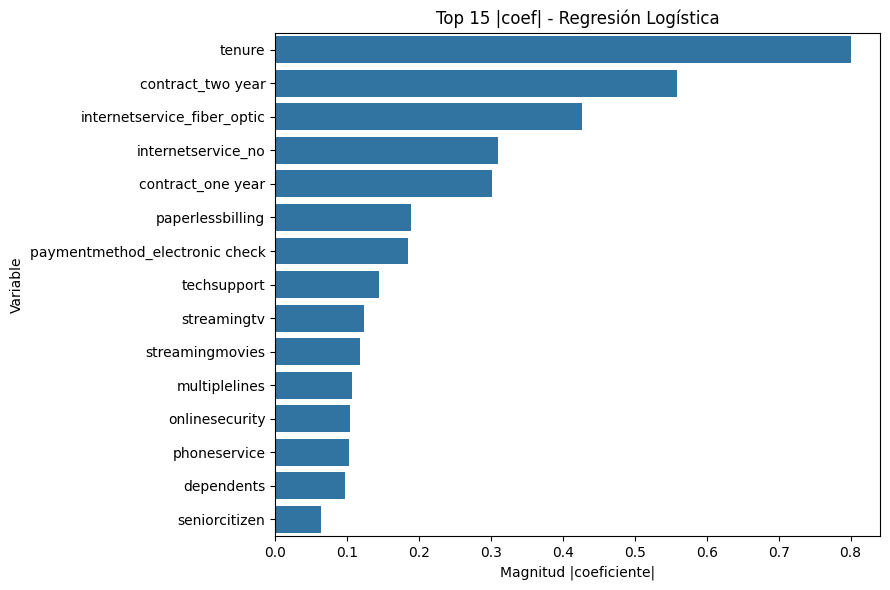


Interpretación (Logística): coeficientes > 0 aumentan la probabilidad de churn; coeficientes < 0 la reducen. La magnitud indica la influencia relativa.

Top 20 variables - Random Forest (por importancia):


,variable,importancia
0,tenure,0.271701
1,contract_two year,0.120012
2,internetservice_fiber_optic,0.101292
3,contract_one year,0.064930
4,paymentmethod_electronic check,0.062724
5,internetservice_no,0.053151
6,paperlessbilling,0.038387
7,techsupport,0.035899
8,onlinesecurity,0.028559
9,gender_male,0.024416


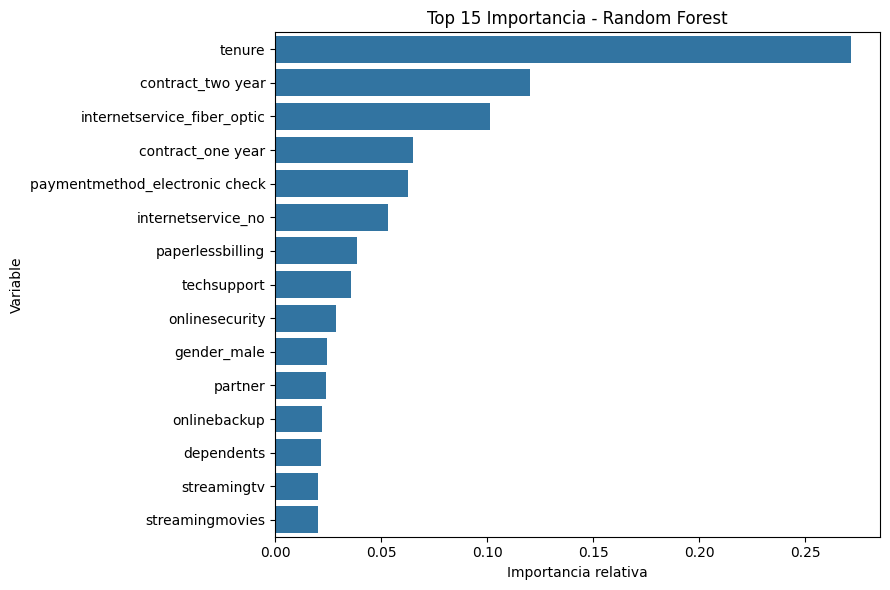


Interpretación (Random Forest): mayor importancia implica mayor contribución a separar churn vs. no churn (reducción de impureza en los árboles).


In [21]:
# ============================================
# 🔎 Análisis de variables: Logística y Random Forest
# ============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que los nombres de features estén disponibles
feature_names = list(X_train.columns)

# -----------------------------
# 1) Regresión Logística: coeficientes
# -----------------------------
log_model = best_log.named_steps["model"]  # modelo dentro del pipeline
coef = pd.Series(log_model.coef_[0], index=feature_names)

# Tabla ordenada por magnitud absoluta
coef_abs = coef.abs().sort_values(ascending=False)
top_log = pd.DataFrame({
    "variable": coef_abs.index,
    "coeficiente": coef.loc[coef_abs.index].values,
    "magnitud_abs": coef_abs.values
}).head(20)

print("Top 20 variables - Regresión Logística (por |coef|):")
display(top_log)

# Gráfica (Top 15 por magnitud)
plt.figure(figsize=(9,6))
sns.barplot(
    x=top_log["magnitud_abs"].head(15),
    y=top_log["variable"].head(15),
    orient="h"
)
plt.title("Top 15 |coef| - Regresión Logística")
plt.xlabel("Magnitud |coeficiente|")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Interpretación breve para notebook
print(
    "\nInterpretación (Logística): coeficientes > 0 aumentan la probabilidad de churn; "
    "coeficientes < 0 la reducen. La magnitud indica la influencia relativa."
)

# -----------------------------
# 2) Random Forest: importancia de variables
# -----------------------------
rf_import = pd.Series(best_rf.feature_importances_, index=feature_names)
rf_sorted = rf_import.sort_values(ascending=False)
top_rf = pd.DataFrame({
    "variable": rf_sorted.index,
    "importancia": rf_sorted.values
}).head(20)

print("\nTop 20 variables - Random Forest (por importancia):")
display(top_rf)

# Gráfica (Top 15 por importancia)
plt.figure(figsize=(9,6))
sns.barplot(
    x=top_rf["importancia"].head(15),
    y=top_rf["variable"].head(15),
    orient="h"
)
plt.title("Top 15 Importancia - Random Forest")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Interpretación breve para notebook
print(
    "\nInterpretación (Random Forest): mayor importancia implica mayor contribución "
    "a separar churn vs. no churn (reducción de impureza en los árboles)."
)

## 📄 Conclusión – Análisis de variables relevantes

En este proyecto se evaluaron dos modelos principales para predecir la cancelación de clientes:

-  Regresión Logística (con normalización)

-  Random Forest (sin normalización)

El análisis de las variables más relevantes en cada modelo permite identificar los factores que más influyen en la probabilidad de churn, facilitando la toma de decisiones estratégicas.

**Regresión Logística**

- Los coeficientes del modelo indican la dirección e intensidad de la relación entre cada variable y la probabilidad de cancelación.

- Coeficiente positivo → aumenta la probabilidad de churn.

- Coeficiente negativo → reduce la probabilidad de churn.

- Las variables con mayor magnitud absoluta (positivas o negativas) son las que tienen mayor influencia en la predicción.

- Este análisis es útil para entender qué factores impulsan la baja y cuáles ayudan a retener clientes.

**Random Forest**

- Utiliza la importancia de las variables calculada a partir de la reducción de la impureza en los nodos de los árboles.

- Una mayor importancia significa que la variable contribuye más a separar correctamente los casos de churn y no churn.

- Esta información es valiosa para priorizar acciones de negocio sobre las características que más determinan la cancelación.


**Conclusión final:**

La interpretación de variables en ambos modelos no solo valida su capacidad predictiva, sino que también provee insights prácticos para diseñar campañas de retención más efectivas, enfocadas en los factores más influyentes.

## Conclusión

###**Objetivo**

Identificar los principales factores que influyen en la cancelación de clientes y proponer estrategias de retención, usando como base las variables más relevantes obtenidas de Regresión Logística y Random Forest.

###🔍 Factores clave detectados

- Regresión Logística: Variables con coeficientes positivos y de gran magnitud aumentan la probabilidad de churn (ej. tenure_bajo, pago_mensual_alto).

- Random Forest: Variables con mayor importancia relativa en la reducción de impureza (ej. total_charges, contract_type, tenure).

Coincidencias entre modelos: Ambas técnicas resaltan la duración del contrato (tenure), el tipo de contrato y el monto de pagos como factores determinantes.

### 📊 Síntesis del rendimiento de modelos

Random Forest (F1=0.627) → Mejor balance entre Precisión y Recall.

Regresión Logística (Recall=0.788) → Más sensible para detectar clientes que cancelarán.

La elección depende de la prioridad del negocio:

Priorizar recall → Logística.

Balance global → Random Forest.

**💡 Estrategias de retención sugeridas**

- Clientes con contratos cortos o sin compromiso:

- Ofrecer descuentos o beneficios por pasar a contratos de mayor duración.

- Clientes con pagos mensuales altos:

- Presentar opciones de planes más económicos o adaptados a su consumo.

- Clientes nuevos con gasto inicial elevado:

- Seguimiento personalizado en los primeros meses para garantizar satisfacción.

- Segmentos con alta probabilidad de churn (según modelos):

- Campañas proactivas de fidelización (llamadas, emails, promociones).

In [23]:
# Combinar top variables de Logística y RF en una sola tabla
factores_log = top_log.rename(columns={"magnitud_abs": "relevancia"}).assign(modelo="Logística")
factores_rf = top_rf.rename(columns={"importancia": "relevancia"}).assign(modelo="Random Forest")

factores_clave = pd.concat([factores_log[["variable","relevancia","modelo"]],
                            factores_rf[["variable","relevancia","modelo"]]],
                            ignore_index=True)

# Ordenar por relevancia dentro de cada modelo
factores_clave = factores_clave.sort_values(["modelo","relevancia"], ascending=[True, False])

display(factores_clave)

,variable,relevancia,modelo
0,tenure,0.800852,Logística
1,contract_two year,0.558799,Logística
2,internetservice_fiber_optic,0.426807,Logística
3,internetservice_no,0.309630,Logística
4,contract_one year,0.301939,Logística
5,paperlessbilling,0.188766,Logística
6,paymentmethod_electronic check,0.185313,Logística
7,techsupport,0.144942,Logística
8,streamingtv,0.123769,Logística
9,streamingmovies,0.117526,Logística
